3.1 Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:

Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/bank .csv')

object_columns = df.select_dtypes(include='object').columns
print("Columns with dtype 'object':")
print(object_columns)

for col in object_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

df_numeric = df.drop(columns=object_columns)

df_numeric.to_csv('banknumericdata.csv', index=False)
print("banknumericdata.csv file has been saved.")

df_numeric_loaded = pd.read_csv('banknumericdata.csv')

summary_statistics = df_numeric_loaded.describe()
print("Summary statistics of the numeric DataFrame:")
print(summary_statistics)


Columns with dtype 'object':
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital':
['married' 'single' 'divorced']
Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default':
['no' 'yes']
Unique values in 'housing':
['yes' 'no']
Unique values in 'loan':
['no' 'yes']
Unique values in 'contact':
['unknown' 'cellular' 'telephone']
Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values in 'y':
['no' 'yes']
Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan   

Problem 2- Data Imputations:
Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [10]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/medical_students_dataset.csv')

# Displaying the structure of the DataFrame, including the number of rows, columns, and the data type of each column
print("DataFrame Information:")
df_info = df.info()  # Get summary of DataFrame structure (column names, non-null counts, data types)

# Checking for missing values in each column of the DataFrame
missing_values = df.isnull().sum()  # Count the number of missing (NaN) values in each column
print("\nMissing values in each column:")
print(missing_values)  # Display the count of missing values for each column

# If the 'Age' column exists in the DataFrame
if 'Age' in df.columns:
    # Fill missing values in the 'Age' column with the median of the column
    df['Age'] = df['Age'].fillna(df['Age'].median())
    print("\nMissing 'Age' values filled with median.")  # Inform the user that missing 'Age' values were filled

# If the 'Gender' column exists in the DataFrame
if 'Gender' in df.columns:
    # Fill missing values in the 'Gender' column with the mode (most frequent value) of the column
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    print("\nMissing 'Gender' values filled with mode (most frequent value).")  # Inform the user that missing 'Gender' values were filled


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            2

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”
Problem - 1:
Create a DataFrame that is subsetted for the columns 'Name', 'Pclass', 'Sex', 'Age', 'Fare', and 'Survived'.
Retain only those rows where 'Pclass' is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the 'Fare' column?

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')

columns_of_interest = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df_subset = df[columns_of_interest]

df_first_class = df_subset[df_subset['Pclass'] == 1]

mean_fare = df_first_class['Fare'].mean()
median_fare = df_first_class['Fare'].median()
max_fare = df_first_class['Fare'].max()
min_fare = df_first_class['Fare'].min()

print("Statistics for 'Fare' column (first-class passengers):")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")


Statistics for 'Fare' column (first-class passengers):
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')

columns_of_interest = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df_subset = df[columns_of_interest]


df_first_class = df_subset[df_subset['Pclass'] == 1]


null_values_in_age = df_first_class['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_values_in_age}")

df_first_class_cleaned = df_first_class.dropna(subset=['Age'])

null_values_after_dropping = df_first_class_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_values_after_dropping}")


Number of null values in 'Age' column: 30
Number of null values in 'Age' column after dropping: 0


Problem-3:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=False)

df = pd.concat([df, df_encoded], axis=1)


df = df.drop('Embarked', axis=1)


print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


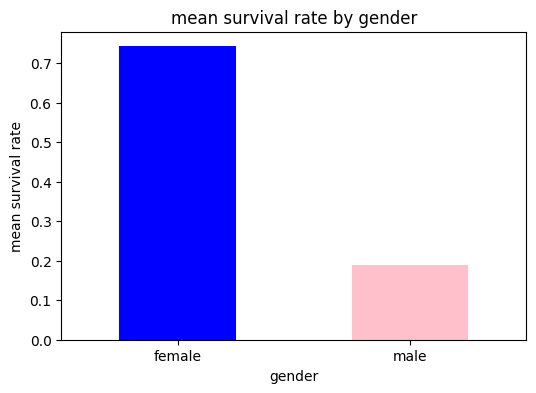

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Datasets/Titanic-Dataset.csv")
meansurvival_by_gender=df.groupby('Sex')['Survived'].mean()
print(meansurvival_by_gender)
plt.figure(figsize=(6, 4))
meansurvival_by_gender.plot(kind='bar',color=['blue','pink'])
plt.title('mean survival rate by gender')
plt.xlabel('gender')
plt.ylabel('mean survival rate')
plt.xticks(rotation=0)
plt.show()


Problem-5

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-9-f1e3bd893801>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', hue='Embarked', ci=None, palette="pastel")


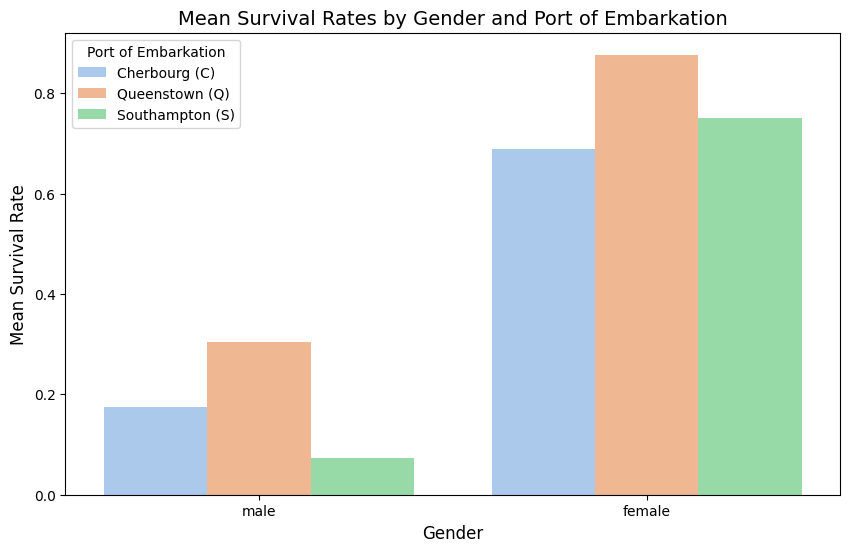

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sex', y='Survived', hue='Embarked', ci=None, palette="pastel")
plt.title("Mean Survival Rates by Gender and Port of Embarkation", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Survival Rate", fontsize=12)
plt.legend(title="Port of Embarkation", labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()